<a href="https://colab.research.google.com/github/ajakrish/Ajay_info5502_spring2022/blob/main/AJAY_KRISHNA_VADLAVALLI_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [3]:

MONET_CSV = pd.read_csv('/content/sample_data/monet.csv')

In [4]:
MONET_CSV.head(3)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3


In [5]:
MONET_CSV.tail(3)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
427,8.2525,25.6,39.6,1,375,1
428,3.4100,25.6,39.4,1,386,2
429,1.5425,25.7,32.0,1,387,1


In [7]:

MONET_CSV.shape

(430, 6)

In [8]:
MONET_CSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


In [9]:

MONET_CSV.isnull().sum()

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64

In [10]:
MONET_CSV.duplicated().sum()

0

In [11]:
MONET_CSV['SIZE'] = MONET_CSV['HEIGHT']*MONET_CSV['WIDTH']

In [12]:
MONET_CSV.head(4)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40


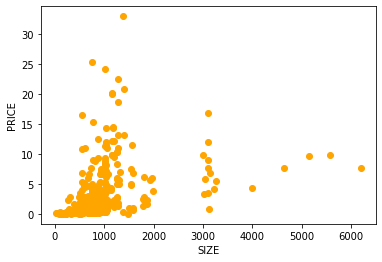

In [13]:
%matplotlib inline
plt.xlabel('SIZE')
plt.ylabel('PRICE')
plt.scatter(MONET_CSV.SIZE, MONET_CSV.PRICE, color = 'Orange')


# **TASK-1**

WITH 'SIZE' AS INDEPENDENT VARIABLE

In [14]:
x = MONET_CSV['SIZE']
x = np.reshape(np.array(x), (len(x), 1))
y = MONET_CSV['PRICE']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [17]:
model_1 = linear_model.LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = model_1.predict(x_test)
y_pred

array([ 8.73555414,  5.29361952,  3.2197981 ,  3.24662292,  3.26137302,
        2.76692505,  2.95162092,  2.75593942,  3.2197981 ,  3.53179941,
        3.22718499,  3.41375126,  2.55393645,  1.412828  ,  2.3167037 ,
        2.52076648,  2.97281087,  2.63997475,  3.23192017,  3.22585914,
        3.75975119,  5.30548116,  2.98649556,  3.50947301,  2.65418031,
        2.55185297,  3.83946803,  1.94695682,  2.99553976,  1.97700157,
        3.2197981 ,  3.10224714,  3.49907928,  3.49907928,  3.41375126,
        2.63441091,  2.80812116,  3.18104061,  8.20426643,  3.45400033,
        8.36708575,  2.97427878,  2.47303582,  2.80613238,  3.4854893 ,
        3.35257267,  1.95562221,  2.63441091,  1.65785013,  2.53622686,
        3.10056615,  4.01833962,  3.46337599,  2.3167037 ,  2.33900642,
        2.513569  ,  2.16375724,  3.27254806,  3.4854893 ,  2.70136642,
        2.22110033,  1.10738492,  2.14510062,  2.80812116,  2.97129562,
        4.29061273,  3.21122742,  3.14337222,  3.53179941,  2.62

In [19]:
actual_pred_values = pd.DataFrame({"ACTUAL": y_test, 'PRED': y_pred})
actual_pred_values.head()

,ACTUAL,PRED
422,5.50250,8.735554
75,6.10000,5.293620
177,0.28600,3.219798
30,3.48000,3.246623
361,2.15073,3.261373


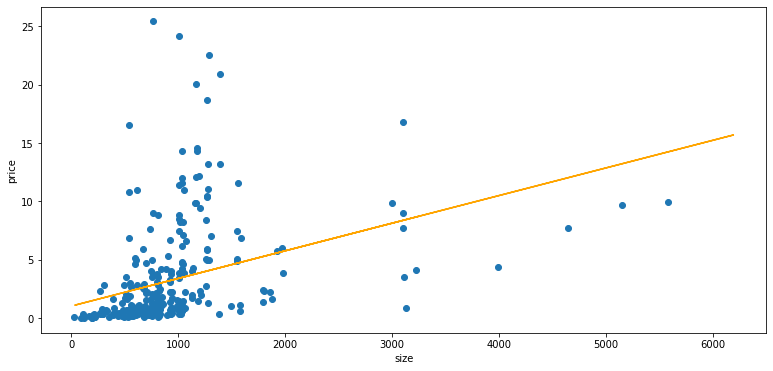

In [22]:
fig = plt.subplots(figsize = (13,6))
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color = 'orange')
plt.xlabel("size")
plt.ylabel("price")
plt.show()

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
r2 = r2_score(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)
root_mean_squared_error =  np.sqrt(mean_squared_error(y_test, y_pred))

In [25]:
print('r2_score = ', r2)
print('mean_absolute_error = ', mean_absolute_error)
print('root_mean_squared_error = ', root_mean_squared_error)

r2_score =  0.07842055918194912
mean_absolute_error =  2.4024378443329524
root_mean_squared_error =  3.9308035065398106


BELOW  'WIDTH' AS INDEPENDENT VARIABLE

In [26]:
x = MONET_CSV['WIDTH']
x = np.reshape(np.array(x), (len(x), 1))
y = MONET_CSV['PRICE']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [28]:
model_2 = linear_model.LinearRegression()
model_2.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred2 = model_2.predict(x_test)
y_pred2

array([ 7.28023593,  3.71521582,  3.92060793,  3.96462052,  3.97929139,
        3.26041902,  3.28976075,  3.23107729,  3.92060793,  3.96462052,
        4.3900756 ,  4.3900756 ,  3.3924568 ,  1.49991527,  2.36549628,
        2.87897654,  3.30443161,  0.75170117,  3.94994966,  3.93527879,
        3.92060793,  3.75922842,  3.31910248,  2.84963481,  2.84963481,
        2.90831827,  2.79095135,  2.02806639,  2.42417974,  2.82029308,
        3.92060793,  4.22869609,  3.94994966,  3.94994966,  4.3900756 ,
        3.28976075,  3.28976075,  3.23107729,  6.98681864,  4.41941733,
       10.15572539,  3.28976075,  2.82029308,  3.30443161,  3.92060793,
        4.33139214,  1.79333256,  3.28976075,  0.81038463,  2.64424271,
        2.54154665,  3.30443161,  4.41941733,  2.36549628,  1.76399083,
        3.28976075,  1.49991527,  3.96462052,  3.92060793,  0.79571376,
        2.35082541, -0.28993022,  1.49991527,  3.28976075,  2.36549628,
        4.3900756 ,  3.92060793,  4.17001263,  3.96462052,  2.82

In [30]:
actual_pred_values = pd.DataFrame({"ACTUAL": y_test, 'PRED2': y_pred2})
actual_pred_values.head()

,ACTUAL,PRED2
422,5.50250,7.280236
75,6.10000,3.715216
177,0.28600,3.920608
30,3.48000,3.964621
361,2.15073,3.979291


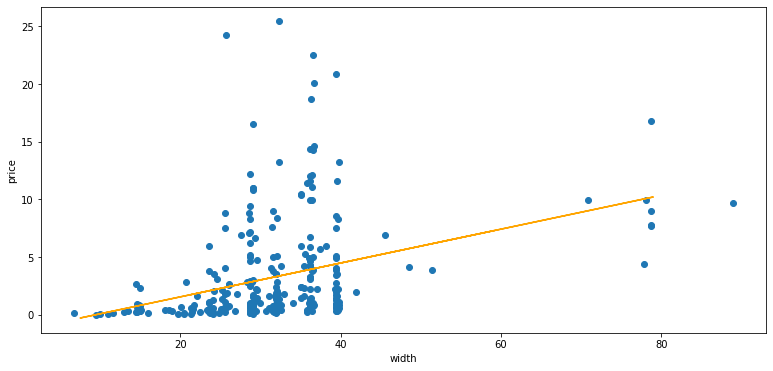

In [32]:
fig = plt.subplots(figsize = (13,6))
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred2, color = 'orange')
plt.xlabel("width")
plt.ylabel("price")
plt.show()

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [34]:
r2 = r2_score(y_test, y_pred2)
mean_absolute_error1 = mean_absolute_error(y_test,y_pred2)
root_mean_squared_error =  np.sqrt(mean_squared_error(y_test, y_pred2))

In [35]:
print('r2_score = ', r2)
print('mean_absolute_error = ', mean_absolute_error)
print('root_mean_squared_error = ', root_mean_squared_error)

r2_score =  0.08703578154399716
mean_absolute_error =  <function mean_absolute_error at 0x7f56d3af8f80>
root_mean_squared_error =  3.9123871543921886


## **TASK-2 **

In [36]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [37]:
norm = MinMaxScaler().fit_transform(MONET_CSV)
norm = pd.DataFrame(norm, columns = MONET_CSV.columns)
norm

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,0.120697,0.232620,0.229648,1.0,0.000000,0.0,0.084174
1,0.266326,0.374332,0.229648,1.0,0.002591,0.5,0.128172
2,0.003675,0.040107,0.111786,0.0,0.005181,1.0,0.013552
3,0.061421,0.291444,0.307412,1.0,0.007772,0.5,0.129106
4,0.044756,0.291444,0.307412,1.0,0.007772,0.5,0.129106
...,...,...,...,...,...,...,...
425,0.159745,0.290107,0.397327,1.0,0.968912,0.0,0.159303
426,0.283067,0.294118,0.399757,1.0,0.968912,0.5,0.162059
427,0.249737,0.290107,0.399757,1.0,0.968912,0.0,0.160133
428,0.103008,0.290107,0.397327,1.0,0.997409,0.5,0.159303


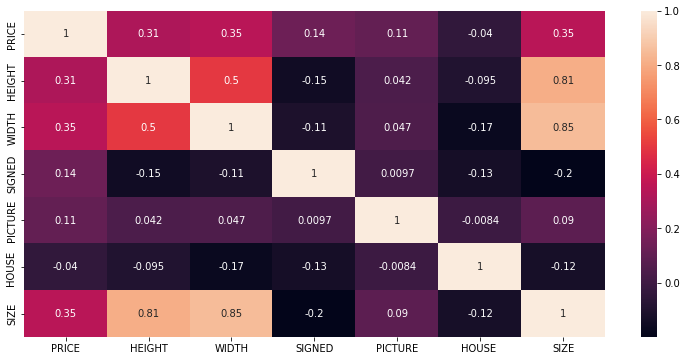

In [38]:
plt.figure(figsize = (13,6))
sns.heatmap(norm.corr(), annot = True)

In [39]:
x = MONET_CSV[['WIDTH', 'HEIGHT', 'SIZE']]
y = MONET_CSV['PRICE']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [41]:
model_3 = linear_model.LinearRegression()
model_3.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred3 = model_3.predict(x_test)
y_pred3

array([ 7.7951066 ,  5.6647729 ,  3.72742791,  3.77401135,  3.79469158,
        2.93807665,  3.16267305,  2.91135245,  3.72742791,  4.03082253,
        3.99601664,  4.14130826,  2.7700765 , -0.27167383,  1.93816554,
        2.45411905,  3.19279524,  3.40048307,  3.75329544,  3.74036167,
        4.22107697,  5.66545003,  3.2142786 ,  3.76108955,  2.61876924,
        2.50858019,  4.21433064,  1.15668904,  3.02617715,  1.69318198,
        3.72742791,  3.79759251,  3.99509557,  3.99509557,  4.14130826,
        2.8013412 ,  2.99921341,  3.40580061,  7.5596196 ,  4.18886245,
        9.25885042,  3.18848247,  2.36290277,  3.00391882,  3.97033459,
        4.06022934,  1.0702642 ,  2.8013412 ,  0.07916075,  2.37686847,
        3.18710285,  4.37756552,  4.19609133,  1.93816554,  1.8470836 ,
        2.66369097,  1.46399103,  3.79735782,  3.97033459,  3.52108456,
        1.77828371, -2.70572361,  1.42086892,  2.99921341,  2.98873857,
        4.8241789 ,  3.71959221,  3.79665599,  4.03082253,  2.57

In [43]:
actual_pred_values = pd.DataFrame({"ACTUAL": y_test, 'PRED3': y_pred3})
actual_pred_values.head()

,ACTUAL,PRED3
422,5.50250,7.795107
75,6.10000,5.664773
177,0.28600,3.727428
30,3.48000,3.774011
361,2.15073,3.794692


In [44]:
r2 = r2_score(y_test, y_pred3)
mean_absolute_error1 = mean_absolute_error(y_test,y_pred3)
root_mean_squared_error =  np.sqrt(mean_squared_error(y_test, y_pred3))

In [45]:
print('r2_score = ', r2)
print('mean_absolute_error = ', mean_absolute_error)
print('root_mean_squared_error = ', root_mean_squared_error)

r2_score =  0.11102359808710016
mean_absolute_error =  <function mean_absolute_error at 0x7f56d3af8f80>
root_mean_squared_error =  3.8606467224272323


**Thanks**